## Demo for learning dual channel PSF from bead data

##### Setup environment

In [23]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *

##### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{psftype}}$:  `'voxel', 'zernike'`  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [24]:
L = psflearninglib()
L.param = io.param.combine(basefile='config_base',psftype='zernike',channeltype='4pi',sysfile='4pi')

##### Edit user defined parameters

In [25]:
L.param.datapath = r'E:\EMBL files\data for PSF learning\bead data\01-08-2022 bead\40nm_600/'
L.param.savename = L.param.datapath + 'psfmodel'
L.param.keyword = 'bead' # keyword for your data file
L.param.subfolder = 'bead' # keyword for subfolder name if each data file is saved in a individual folder, set to '' if no subfolder
L.param.gain = 0.44
L.param.ccd_offset = 100
L.param.FOV.z_step = 1  
L.param.pixel_size.z = 0.05 # micron, equal to z_step*stepsize_of_the_data
L.param.roi.max_bead_number = 20 # lower this number if out of memory 

Optional parameters for zernike PSF learning, change cell type to $\small\color{#318CE7}{\mathrm{Python}}$ to activate the cell  
Parameter | Options | Default
--- | --- | ---
$\small\color{skyblue}{\mathrm{PSFtype}}$   | `'zernike', 'pupil'` | `'zernike'`


In [26]:
L.param.PSFtype = 'pupil'

##### Start learning

In [27]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
for k in range(0,1): # increase iteration number if necessary
    psfobj,fitter = L.learn_psf(dataobj,time=0)
resfile = L.save_result(psfobj,dataobj,fitter)

E:\EMBL files\data for PSF learning\bead data\01-08-2022 bead\40nm_600\bead10_step50nm_060\bead10_step50nm__560_00000_00020_mode000_amp000.mat
E:\EMBL files\data for PSF learning\bead data\01-08-2022 bead\40nm_600\bead11_step50nm_061\bead11_step50nm__560_00000_00020_mode000_amp000.mat
E:\EMBL files\data for PSF learning\bead data\01-08-2022 bead\40nm_600\bead12_step50nm_062\bead12_step50nm__560_00000_00020_mode000_amp000.mat
E:\EMBL files\data for PSF learning\bead data\01-08-2022 bead\40nm_600\bead13_step50nm_063\bead13_step50nm__560_00000_00020_mode000_amp000.mat
E:\EMBL files\data for PSF learning\bead data\01-08-2022 bead\40nm_600\bead14_step50nm_064\bead14_step50nm__560_00000_00020_mode000_amp000.mat
E:\EMBL files\data for PSF learning\bead data\01-08-2022 bead\40nm_600\bead15_step50nm_065\bead15_step50nm__560_00000_00020_mode000_amp000.mat
E:\EMBL files\data for PSF learning\bead data\01-08-2022 bead\40nm_600\bead16_step50nm_066\bead16_step50nm__560_00000_00020_mode000_amp000.mat

3/6: learning: 51/100 [00:05s]  9.43it/s, current loss: 0.59888, total time: 5.40s
3/6: learning: 52/100 [00:05s]  9.86it/s, current loss: 0.58535, total time: 10.67s
3/6: learning: 53/100 [00:05s] 10.07it/s, current loss: 0.58986, total time: 15.93s
3/6: learning: 51/100 [00:05s] 10.01it/s, current loss: 0.56159, total time: 21.02s
3/6: learning: 78/250 [00:31s]  2.49it/s, current loss: 2.34043, total time: 52.30s
4/6: calculating spline coefficients: 4/4 [00:10s]  2.65s/it total time: 62.89s
5/6: localization: 4/4 [00:06s]  1.66s/it total time: 69.55s


outlier id: [ 1 11 19]
rois shape channel 0: (17, 3, 21, 21, 21)
rois shape channel 1: (17, 3, 21, 21, 21)
rois shape channel 2: (17, 3, 21, 21, 21)
rois shape channel 3: (17, 3, 21, 21, 21)


3/6: learning: 197/250 [01:18s]  2.52it/s, current loss: 1.93451, total time: 147.71s
4/6: calculating spline coefficients: 4/4 [00:10s]  2.63s/it total time: 158.25s
5/6: localization: 4/4 [00:07s]  1.80s/it total time: 165.44s
6/6: saving results: [00:00s] total time: 165.77s


##### Show results

In [28]:
f,p = io.h5.load(resfile) # load result file

channel 0


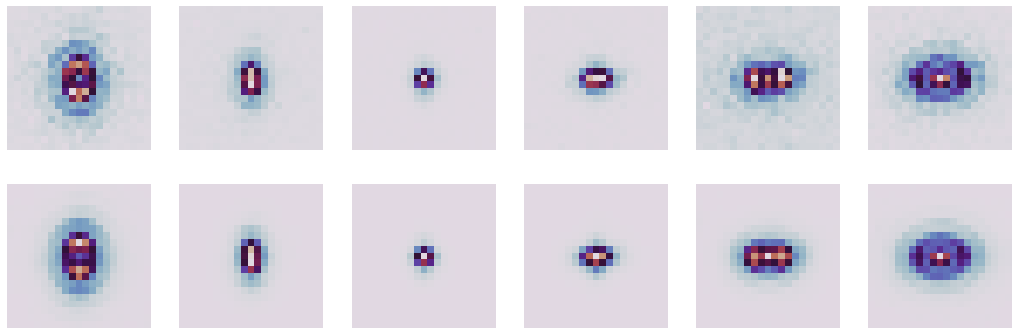

channel 1


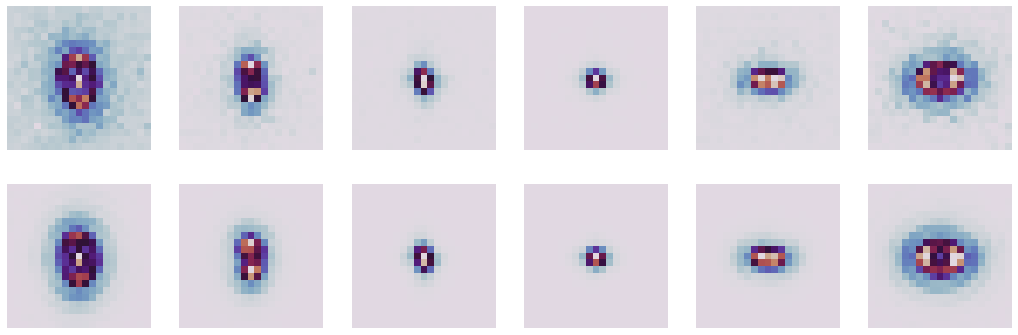

channel 2


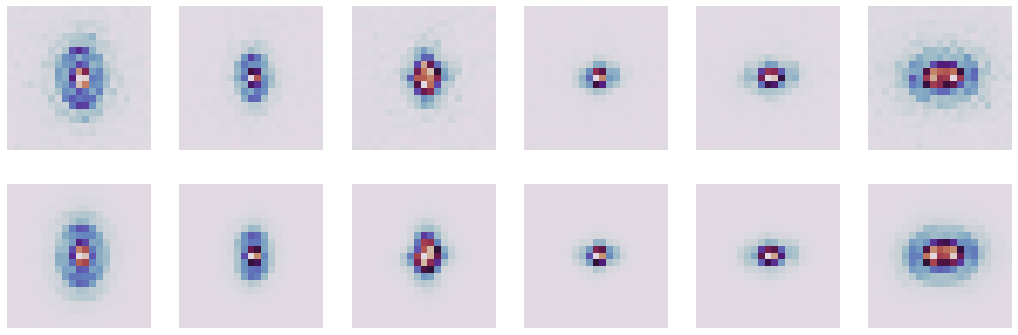

channel 3


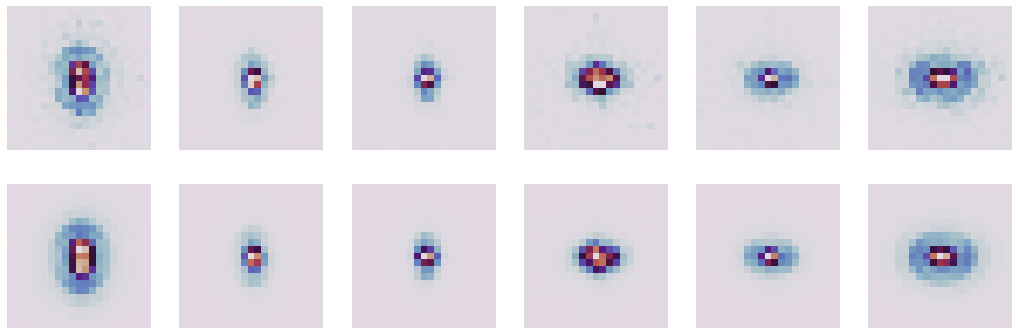

In [29]:
showpsfvsdata(f,p,index=0)

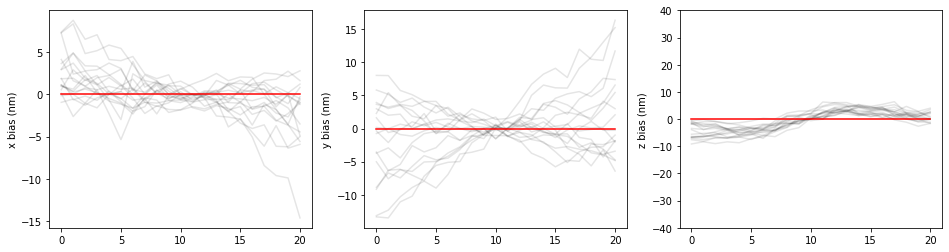

In [30]:
showlocalization(f,p)

##### Optional plots

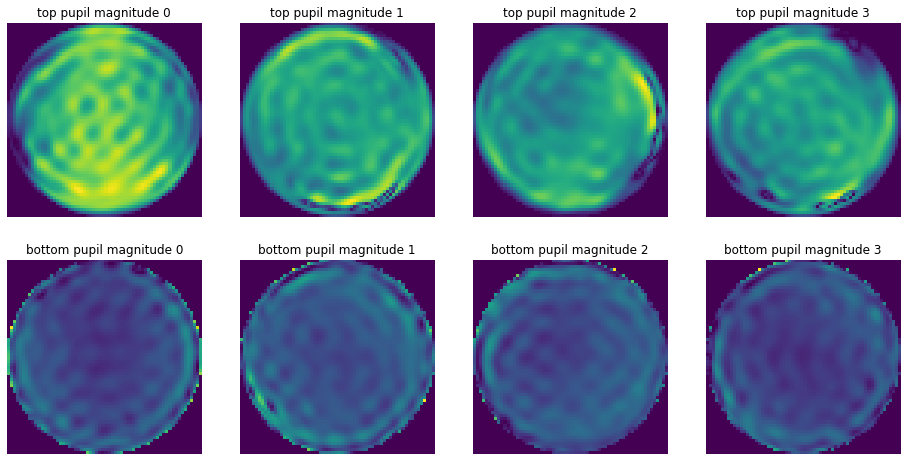

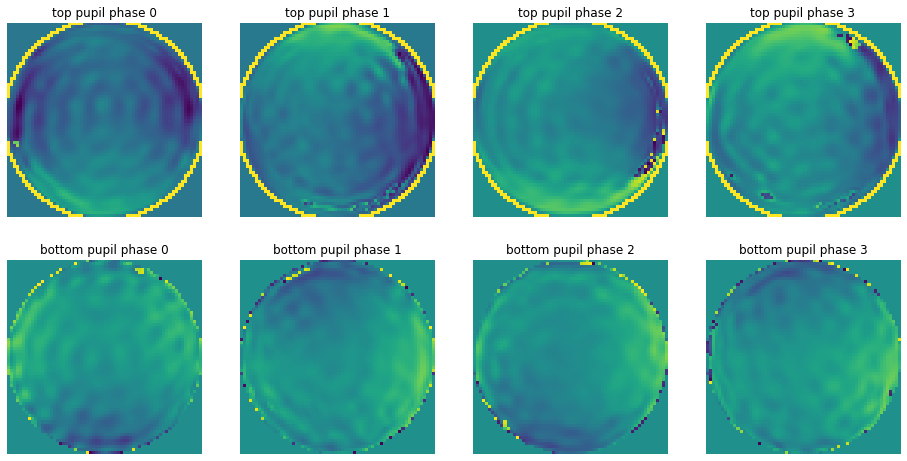

In [31]:
try:
    showpupil(f,p)
except:
    print('no learned pupil')

no learned Zernike coefficients


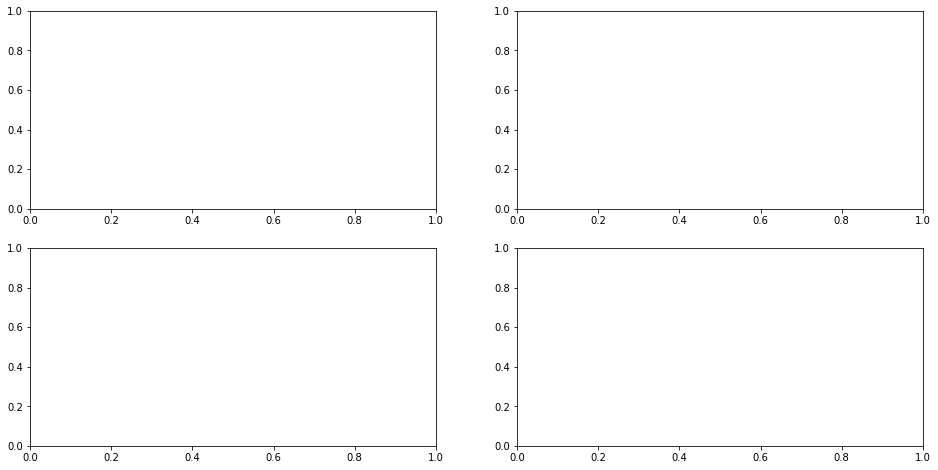

In [32]:
try:
    showzernike(f,p)
except:
    print('no learned Zernike coefficients')

[[[ 0.9978  0.0063 -0.    ]
  [-0.005   0.9984  0.    ]
  [-0.9536  0.429   1.    ]]

 [[ 0.9958  0.0013 -0.    ]
  [ 0.0011  0.9968  0.    ]
  [-0.6294  1.4318  1.    ]]

 [[ 0.9958 -0.006  -0.    ]
  [ 0.0058  0.9983  0.    ]
  [-0.3673  0.8832  1.    ]]]


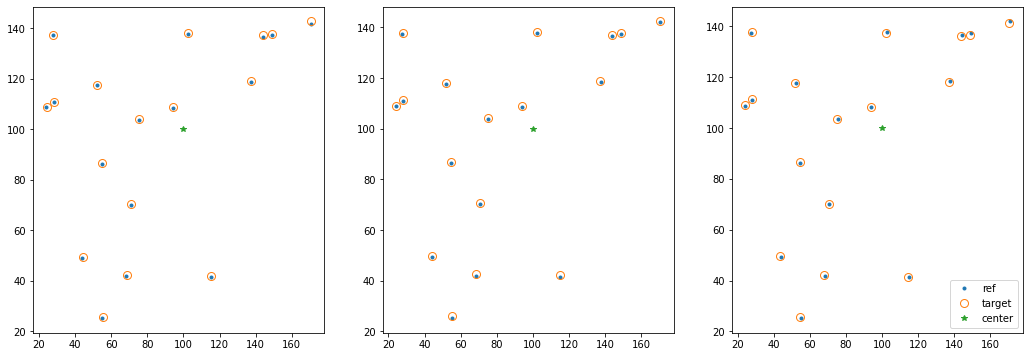

In [33]:
showtransform(f)
np.set_printoptions(precision=4,suppress=True)
print(f.res.T)

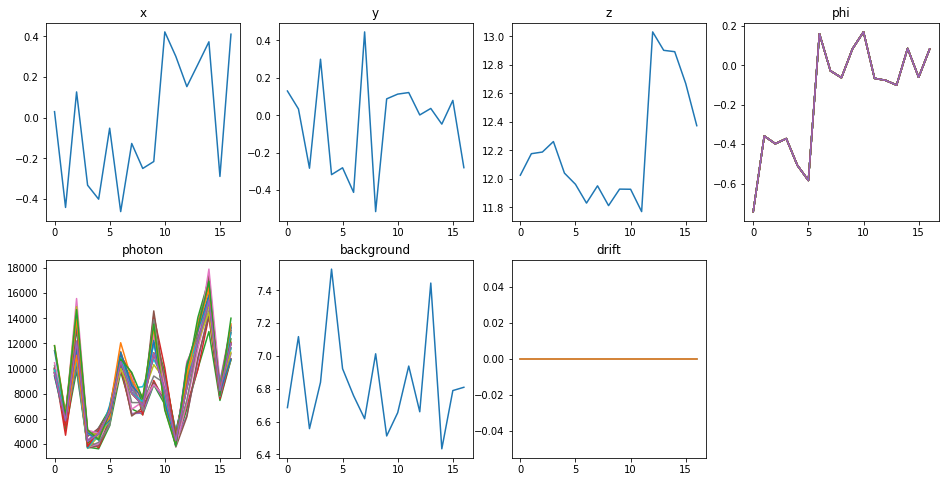

In [34]:
showlearnedparam(f,p)